<a href="https://colab.research.google.com/github/kl20879/CE880-lad-class/blob/main/Case%20Study/Classification_Regression_Predict_Abalone__Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB



In [ ]:
#the datasets of abalone
df=pd.read_csv(r'c:/abalone.csv')
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
#use digtal instead of sex
df["Sex"]=df["Sex"].replace("M",1).replace("F",0).replace("I",2)
#across compute ,Rings to Age,and rename to Age
df["Rings"]=df["Rings"]+1.5
df.rename(columns={"Rings":"Age"},inplace=True)
#regression datasets
ada_reg=df.to_numpy()
df1=df
#the values below 10 of column "Age" are represented by 0, the values from 10 to 20 are represented by 1, and the values above 20 are represented by 2
df1.loc[df[df.Age<10].index.tolist(),"Age"]=0
df1.Age[(df.Age>=10) & (df.Age<20)]=1
df1.Age[df.Age>20]=2
#classification datasets
ada_cls=df1.to_numpy()


C:\Users\ZYZN\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ZYZN\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
ada_cls

array([[1.    , 0.455 , 0.365 , ..., 0.101 , 0.15  , 1.    ],
       [1.    , 0.35  , 0.265 , ..., 0.0485, 0.07  , 0.    ],
       [0.    , 0.53  , 0.42  , ..., 0.1415, 0.21  , 1.    ],
       ...,
       [1.    , 0.6   , 0.475 , ..., 0.2875, 0.308 , 1.    ],
       [0.    , 0.625 , 0.485 , ..., 0.261 , 0.296 , 1.    ],
       [1.    , 0.71  , 0.555 , ..., 0.3765, 0.495 , 1.    ]])

In [ ]:
ada_cls[:,0].size

4177

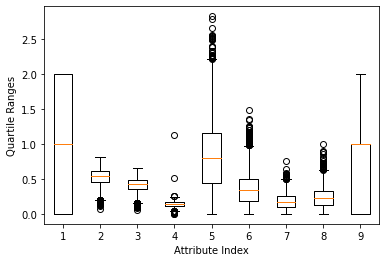

In [ ]:
#boxplot show the numerical distribution
array = df.iloc[:,0:9].values
boxplot(array)
plt.xlabel("Attribute Index")
plt.ylabel("Quartile Ranges")
show()

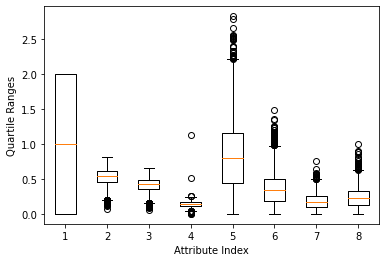

In [ ]:
#boxplot show the numerical distribution after delete the "age"
array1 = df.iloc[:,0:8].values
boxplot(array1)
plt.xlabel("Attribute Index")
plt.ylabel("Quartile Ranges")
show()

In [ ]:
# function of noramlization
def noramlization(data):
    minVals = data.min(0)
    maxVals = data.max(0)
    ranges = maxVals - minVals
    normData = np.zeros(np.shape(data))
    m = data.shape[0]
    normData = data - np.tile(minVals, (m, 1))
    normData = normData/np.tile(ranges, (m, 1))
    return normData
#normalize the  features datasets 
fea_nor=noramlization(ada_reg[:,0:8])
#classification and regression data sets with normalized features
ada_reg=np.c_[fea_nor,ada_reg[:,8]]
ada_cls=np.c_[fea_nor,ada_cls[:,8]]
ada_reg

array([[ 0.5       ,  0.51351351,  0.5210084 , ...,  0.1323239 ,
         0.14798206, 16.5       ],
       [ 0.5       ,  0.37162162,  0.35294118, ...,  0.06319947,
         0.06826109,  8.5       ],
       [ 0.        ,  0.61486486,  0.61344538, ...,  0.18564845,
         0.2077728 , 10.5       ],
       ...,
       [ 0.5       ,  0.70945946,  0.70588235, ...,  0.37788018,
         0.30543099, 10.5       ],
       [ 0.        ,  0.74324324,  0.72268908, ...,  0.34298881,
         0.29347285, 11.5       ],
       [ 0.5       ,  0.85810811,  0.84033613, ...,  0.49506254,
         0.49177877, 13.5       ]])

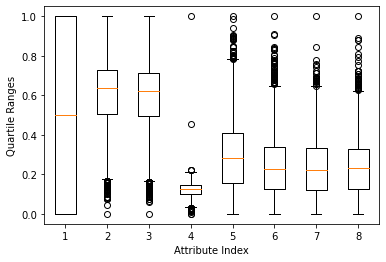

In [ ]:
#boxplot show the numerical distribution after delete the "age" and  normalization
boxplot(ada_reg[:,0:8])
plt.xlabel("Attribute Index")
plt.ylabel("Quartile Ranges")
show()

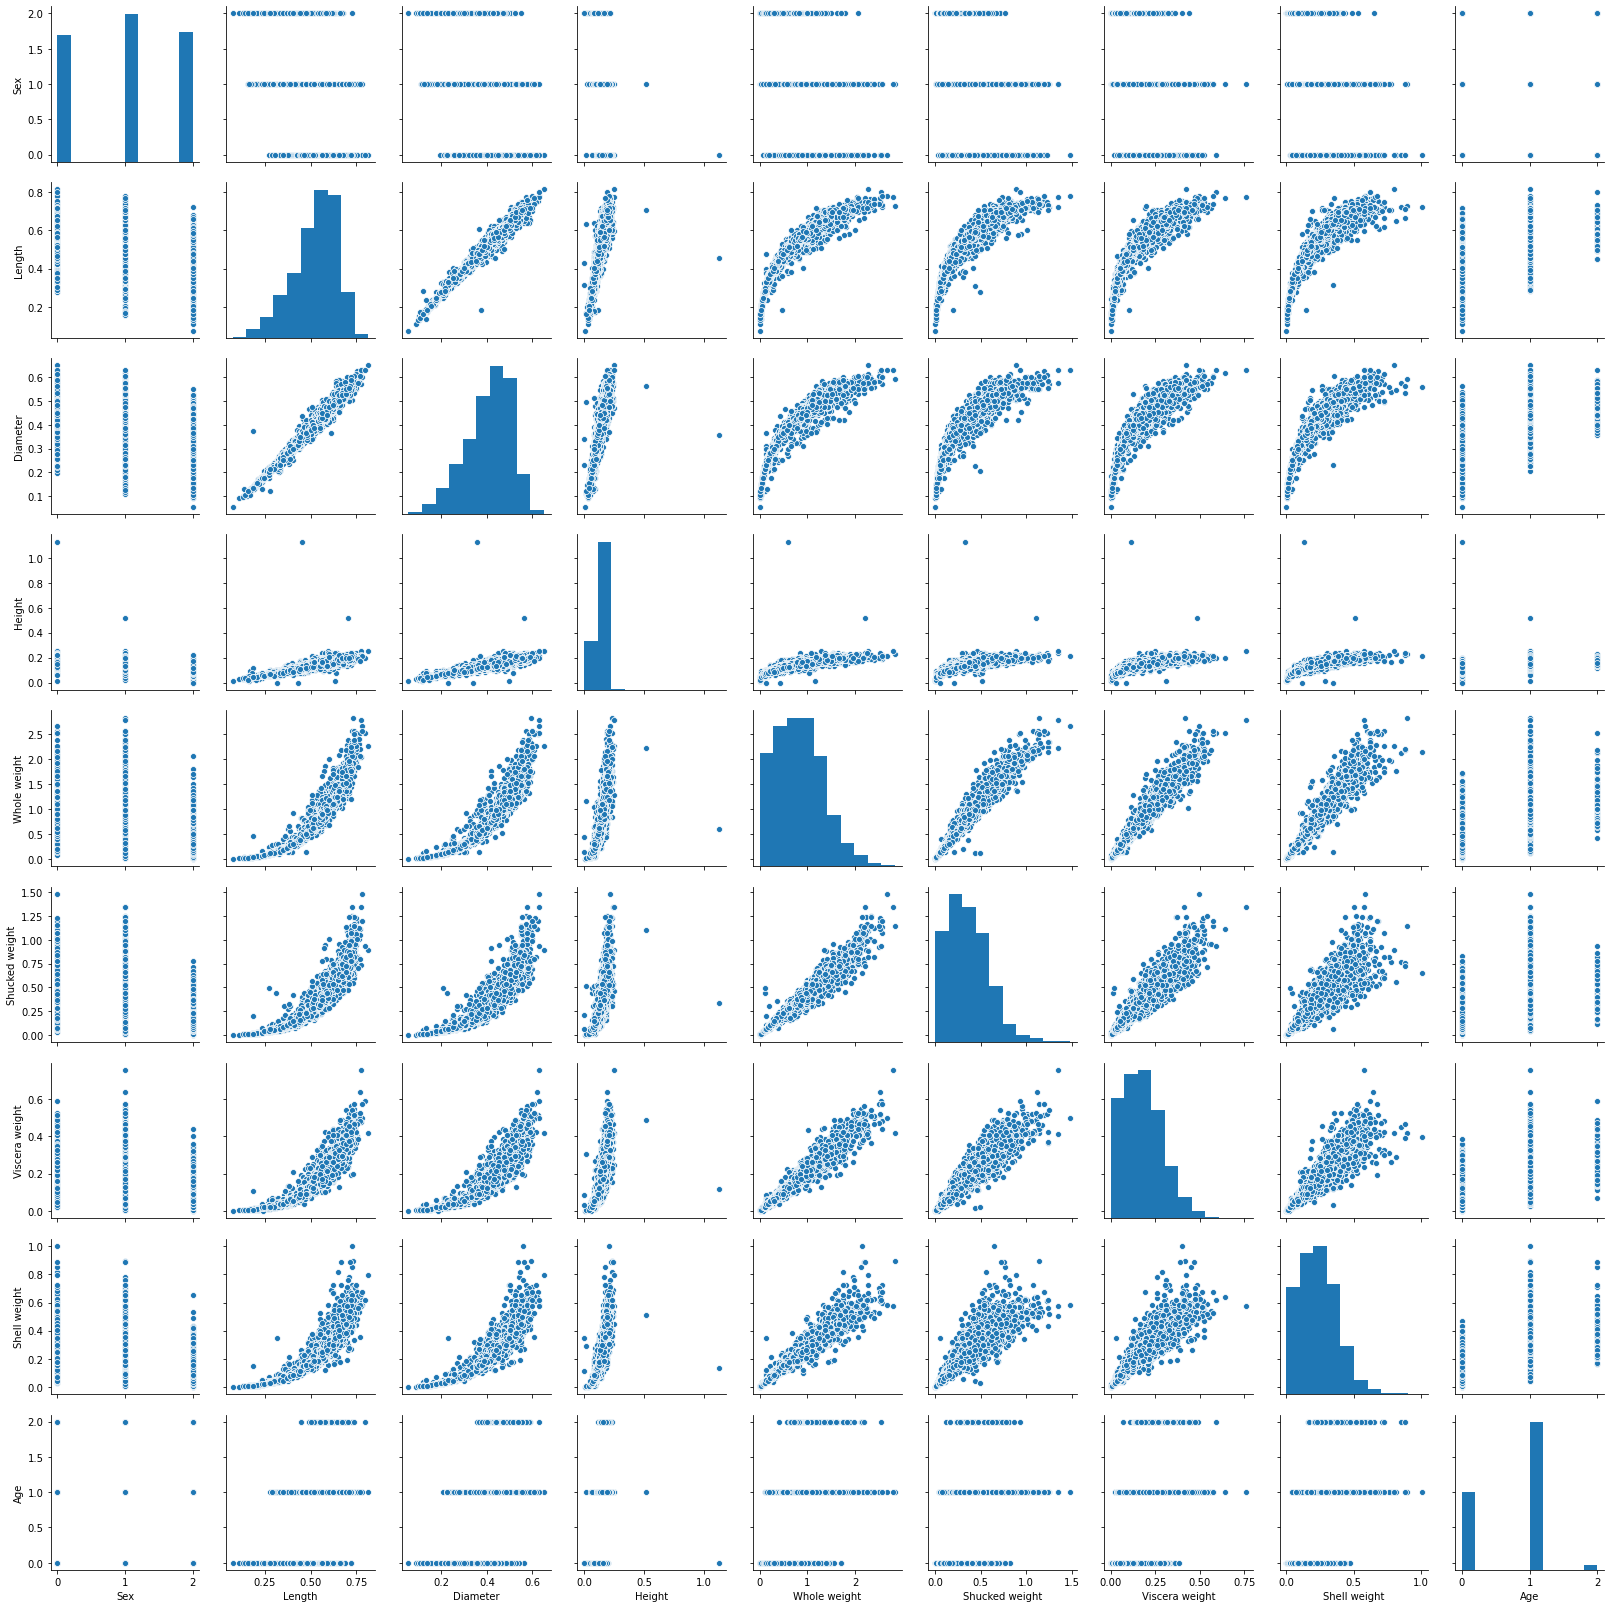

In [ ]:
#pairplot
sns.pairplot(df,height=2.5)

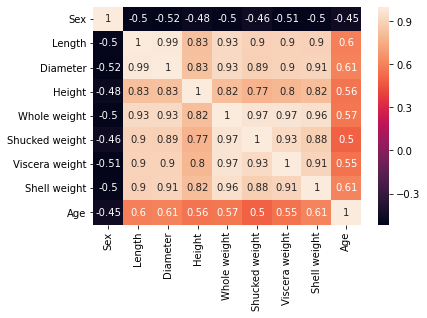

In [ ]:
#by the heatmap shows attribute correlation
cor = pd.DataFrame(df.iloc[:,0:9].corr())
sns.heatmap(cor, annot=True)

In [ ]:
#Divide feature datasets and result datasets
#feature datasets of regression and classfication
X_reg = ada_reg[:,0:-1]
X_cls = ada_cls[:,0:-1]
#result datasets of regression and classfication
y_reg = ada_reg[:,-1]
y_cls = ada_cls[:,-1]
#7:3 divide regression datasets and classfication datasets to training datasets ,tesing datasets respectively
X_train_reg,X_test_reg,y_train_reg,y_test_reg = train_test_split(X_reg,y_reg,test_size=0.3,random_state=0)
X_train_cls,X_test_cls,y_train_cls,y_test_cls = train_test_split(X_cls,y_cls,test_size=0.3,random_state=0)


In [ ]:
X_cls[:,0:30]

array([[0.5       , 0.51351351, 0.5210084 , ..., 0.15030262, 0.1323239 ,
        0.14798206],
       [0.5       , 0.37162162, 0.35294118, ..., 0.06624075, 0.06319947,
        0.06826109],
       [0.        , 0.61486486, 0.61344538, ..., 0.17182246, 0.18564845,
        0.2077728 ],
       ...,
       [0.5       , 0.70945946, 0.70588235, ..., 0.3527236 , 0.37788018,
        0.30543099],
       [0.        , 0.74324324, 0.72268908, ..., 0.35642233, 0.34298881,
        0.29347285],
       [0.5       , 0.85810811, 0.84033613, ..., 0.63517149, 0.49506254,
        0.49177877]])

In [ ]:
# Create linear regression object
lr = LinearRegression()
# Train the model using the training sets
lr.fit(X_train_reg, y_train_reg)
# Make predictions using the testing set
y_pred_lr = lr.predict(X_test_reg)
# The coefficients
print("Coefficients: \n", lr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_reg, y_pred_lr))
# The coefficient of determination: 1 is perfect prediction
#print("Coefficient of determination: %.2f" % r2_score(y_test_reg, y_pred_lr))
lr.score(X_test_reg,y_test_reg)

Coefficients: 
 [ -0.67670713  -0.25745895   6.92990129   8.39361603  25.96774562
 -29.7612363   -8.1992324    9.52200067]
Mean squared error: 5.04


0.5218013906519711

In [ ]:
#GradientBoostingRegressor training and evaluate
gbreg = GradientBoostingRegressor(max_depth=3,n_estimators=100,random_state=0,learning_rate=0.1) 
gbreg.fit(X_train_reg, y_train_reg)
gbreg.score(X_test_reg, y_test_reg)

0.5320095355753292

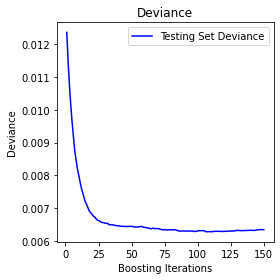

In [ ]:
#compute the test set deviance and then plot testing deviance
test_score = np.zeros(150, dtype=np.float64)
for i, y_pred_gbreg in enumerate(gbreg.staged_predict(X_test_reg)):
    test_score[i] = gbreg.loss_(y_test_reg, y_pred_gbreg)
fig = plt.figure(figsize=(4, 4))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(150) + 1,
    test_score,
    "b-",
    label="Testing Set Deviance",
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [ ]:
#grid search the GradientBoostingRegressor best params
param_gbr = {'n_estimators':range(10,151,10),'max_depth':range(1,10,1),'learning_rate':np.arange(0.1,1,0.1,dtype =  float)}
gs_gbr_1 = GridSearchCV(estimator = GradientBoostingRegressor(random_state=0), 
                       param_grid = param_gbr, scoring='r2',cv=5)
gs_gbr_1.fit(X_train_reg, y_train_reg)
gs_gbr_1.cv_results_, gs_gbr_1.best_params_, gs_gbr_1.best_score_

({'mean_fit_time': array([0.01617866, 0.02313766, 0.03464894, ..., 1.00650787, 1.10284781,
         1.19559126]),
  'std_fit_time': array([0.00944307, 0.00039942, 0.00067461, ..., 0.02191808, 0.00457006,
         0.03377153]),
  'mean_score_time': array([0.00074496, 0.00039902, 0.00060425, ..., 0.00377831, 0.00358758,
         0.00400071]),
  'std_score_time': array([6.64476089e-04, 4.88694526e-04, 4.93498230e-04, ...,
         4.06861919e-04, 4.85932875e-04, 1.37956827e-05]),
  'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, ..., 0.9, 0.9, 0.9],
               mask=[False, False, False, ..., False, False, False],
         fill_value='?',
              dtype=object),
  'param_max_depth': masked_array(data=[1, 1, 1, ..., 9, 9, 9],
               mask=[False, False, False, ..., False, False, False],
         fill_value='?',
              dtype=object),
  'param_n_estimators': masked_array(data=[10, 20, 30, ..., 130, 140, 150],
               mask=[False, False, False, ..., False

In [ ]:
#RandomForestRegressor training and evaluate by default params
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train_reg, y_train_reg)
rfr.score(X_test_reg, y_test_reg)

0.5409948253012296

In [ ]:
#Model training and evaluation by ajusted params
rfr1 = RandomForestRegressor(n_estimators=140,max_depth=7,random_state=0)
rfr1.fit(X_train_reg, y_train_reg)
rfr1.score(X_test_reg, y_test_reg)

0.5397585436368812

In [ ]:
#grid search the RandomForestRegressor best params
param_rfr = {'n_estimators':range(10,151,10),'max_depth':range(1,10,1)}
gs_rfr = GridSearchCV(estimator = RandomForestRegressor(random_state=0), 
                       param_grid = param_rfr, scoring='r2',cv=5)
gs_rfr.fit(X_train_reg, y_train_reg)
gs_rfr.cv_results_, gs_rfr.best_params_, gs_rfr.best_score_

({'mean_fit_time': array([0.02318335, 0.03371539, 0.04787216, 0.06343603, 0.07938728,
         0.09153719, 0.10770063, 0.12346926, 0.13883491, 0.1536057 ,
         0.16635766, 0.18112741, 0.19807653, 0.36818137, 0.23375239,
         0.02233472, 0.0412889 , 0.06203413, 0.08178058, 0.10571742,
         0.12486677, 0.14421878, 0.1657515 , 0.18610854, 0.21760631,
         0.23417921, 0.25052414, 0.26967807, 0.29041705, 0.31176033,
         0.0263288 , 0.05704689, 0.08139381, 0.11487589, 0.13224669,
         0.15538392, 0.18071032, 0.20604954, 0.23517156, 0.25571585,
         0.28064294, 0.30497332, 0.33171821, 0.35964904, 0.38277092,
         0.03190794, 0.06343565, 0.09294715, 0.12327008, 0.15458632,
         0.18449507, 0.21522365, 0.24515028, 0.27505836, 0.30657964,
         0.33849525, 0.36700668, 0.39832873, 0.43084221, 0.45977502,
         0.0371058 , 0.07180233, 0.10811028, 0.14102273, 0.17712545,
         0.21221967, 0.24773111, 0.2836411 , 0.32115283, 0.35585227,
         0.391950

In [ ]:
#Model training and evaluation by ajusted params
r1=LinearRegression()
r2=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1, max_depth=3,random_state=0)
r3=RandomForestRegressor(n_estimators=140,max_depth=7,random_state=0)
r1.fit(X_train_reg, y_train_reg)
r2.fit(X_train_reg, y_train_reg)
r3.fit(X_train_reg, y_train_reg)
vr=VotingRegressor([("lr",r1),("gbr",r2),("rfr",r3)])
vr.fit(X_train_reg, y_train_reg)
vr.score(X_test_reg, y_test_reg)

0.5503437918729912

In [ ]:
#Model training and evaluation by default params
r4=LinearRegression()
r5=GradientBoostingRegressor(random_state=0)
r6=RandomForestRegressor(random_state=0)
r4.fit(X_train_reg, y_train_reg)
r5.fit(X_train_reg, y_train_reg)
r6.fit(X_train_reg, y_train_reg)
vr=VotingRegressor([("lr",r4),("gbr",r5),("rfr",r6)])
vr.fit(X_train_reg, y_train_reg)
vr.score(X_test_reg, y_test_reg)

0.5570099534729439

In [ ]:
vr.transform(X_test_reg)

array([[0.42563966, 0.49571019, 0.48334002],
       [0.2978583 , 0.30051388, 0.30173633],
       [0.32388883, 0.33769652, 0.337196  ],
       ...,
       [0.29906638, 0.27457604, 0.32020415],
       [0.62666382, 0.62250064, 0.56705812],
       [0.36653199, 0.37330364, 0.36124702]])

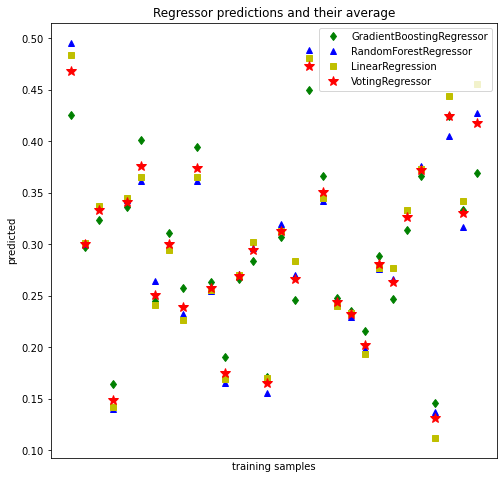

In [ ]:

plt.figure(figsize=(8, 8))
plt.plot(vr.transform(X_test_reg)[0:30,0], "gd", label="GradientBoostingRegressor")
plt.plot(vr.transform(X_test_reg)[0:30,1], "b^", label="RandomForestRegressor")
plt.plot(vr.transform(X_test_reg)[0:30,2], "ys", label="LinearRegression")
plt.plot(vr.predict(X_test_reg)[0:30], "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc=0)
plt.title("Regressor predictions and their average")

plt.show()

In [ ]:
#Model training and evaluation by default params
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train_cls, y_train_cls)
neigh.score(X_test_cls,y_test_cls)

0.8110047846889952

In [ ]:
#Model training and evaluation by ajusted params
neigh1 = KNeighborsClassifier(n_neighbors=13,weights='uniform')
neigh1.fit(X_train_cls, y_train_cls)
neigh1.score(X_test_cls,y_test_cls)

0.828548644338118

In [ ]:
#grid search the KNeighborsClassifier best params
param_knc = {'n_neighbors':range(1,15,1),'weights':['distance','uniform']}
gs_knc = GridSearchCV(estimator = KNeighborsClassifier(), 
                       param_grid = param_knc, scoring='accuracy')
gs_knc.fit(X_train_cls, y_train_cls)
gs_knc.cv_results_, gs_knc.best_params_, gs_knc.best_score_

({'mean_fit_time': array([0.00598216, 0.00551786, 0.0045876 , 0.00438795, 0.00418916,
         0.00159521, 0.00522966, 0.00418301, 0.00339422, 0.00705094,
         0.00624952, 0.00392275, 0.00438747, 0.00534778, 0.00301108,
         0.0045939 , 0.00392232, 0.00725398, 0.00625529, 0.00442605,
         0.00312433, 0.00442533, 0.00398898, 0.00346971, 0.00312443,
         0.00624413, 0.00472455, 0.00708899]),
  'std_fit_time': array([1.09266770e-03, 5.28297961e-03, 4.88870129e-04, 4.88830761e-04,
         3.99282879e-04, 1.95372658e-03, 5.77013494e-03, 4.01662823e-04,
         6.13612945e-03, 7.14938188e-03, 7.65407154e-03, 6.05208491e-03,
         4.87955285e-04, 5.34412254e-03, 4.31389028e-03, 7.93596580e-04,
         6.05042986e-03, 7.07043842e-03, 7.66114263e-03, 6.13142448e-03,
         6.24866486e-03, 6.13845494e-03, 9.88790577e-07, 1.76973774e-03,
         6.24885559e-03, 7.64747917e-03, 5.74502414e-03, 7.13466454e-03]),
  'mean_score_time': array([0.00718141, 0.01829796, 0.00514712

In [ ]:
#Model training and evaluation
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_cls, y_train_cls)
rfc.score(X_test_cls,y_test_cls)

0.8301435406698564

In [ ]:
#Model training and evaluation
rfc1 = RandomForestClassifier(n_estimators=50,max_depth=7,random_state=0)
rfc1.fit(X_train_cls, y_train_cls)
print(rfc1.score(X_test_cls,y_test_cls))
#
print(y_test_cls[0:10])
print(rfc1.predict(X_test_cls)[0:10])

0.8221690590111643
[1. 0. 1. 0. 1. 1. 0. 0. 0. 1.]
[1. 1. 1. 0. 1. 1. 0. 1. 0. 1.]


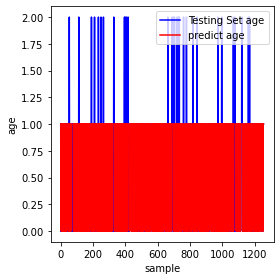

In [ ]:
#Plot the percentage of predictive accuracy of the model
fig = plt.figure(figsize=(4, 4))
plt.subplot(1, 1, 1)
plt.plot(np.arange(y_test_cls.size) + 1,y_test_cls,"b-",label="Testing Set age")
plt.plot(np.arange(rfc1.predict(X_test_cls).size) + 1,rfc1.predict(X_test_cls),"r-",label="predict age")
plt.legend(loc="upper right")
plt.xlabel("sample")
plt.ylabel("age")
fig.tight_layout()
plt.show()

In [ ]:
#grid search the RandomForestClassifier best params
param_rfc = {'n_estimators':range(10,151,10),'max_depth':range(1,15,1)}
gs_rfc = GridSearchCV(estimator = RandomForestClassifier(random_state=0), 
                       param_grid = param_rfc, scoring='accuracy')
gs_rfc.fit(X_train_cls, y_train_cls)
gs_rfc.cv_results_, gs_rfc.best_params_, gs_rfc.best_score_

({'mean_fit_time': array([0.02443929, 0.02992673, 0.04348984, 0.05545216, 0.07318125,
         0.08495975, 0.11107326, 0.11080184, 0.12448349, 0.13124828,
         0.14525514, 0.17211604, 0.17930789, 0.18622928, 0.19597631,
         0.01495929, 0.03031802, 0.04507957, 0.05984054, 0.07380238,
         0.08896313, 0.10352302, 0.12026792, 0.13324385, 0.15038881,
         0.16490059, 0.18015389, 0.19348941, 0.20485168, 0.22281089,
         0.01712866, 0.03271275, 0.04926839, 0.06415358, 0.0813827 ,
         0.09654727, 0.11887622, 0.12885065, 0.1470017 , 0.16295867,
         0.17912755, 0.19228468, 0.2074513 , 0.22539129, 0.23975763,
         0.01859012, 0.03690777, 0.05305381, 0.0721602 , 0.0887773 ,
         0.1091125 , 0.11692691, 0.13586531, 0.15735025, 0.17478933,
         0.19774013, 0.21145129, 0.22454443, 0.24776955, 0.26111999,
         0.02026591, 0.03454781, 0.06127186, 0.07555609, 0.1032362 ,
         0.12099895, 0.13592944, 0.15784822, 0.17924237, 0.19510245,
         0.217048

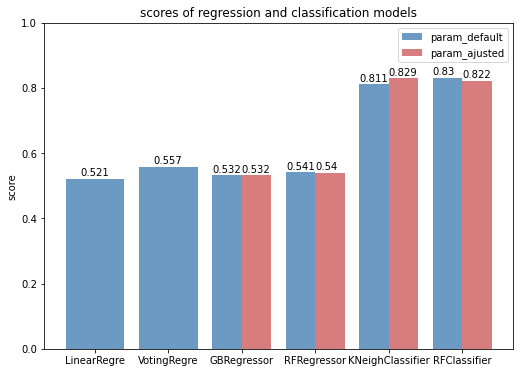

In [ ]:
#Model scores for different parameters
#default params model scores
param_default =[0.532,0.541,0.811,0.830]
#ajusted params model scores
param_ajusted =[0.532,0.540,0.829,0.822]
#no exhaustive search parameters model scores
gridsear_no=[0.521,0.557]
labels = ['LinearRegre','VotingRegre','GBRegressor','RFRegressor','KNeighClassifier','RFClassifier']
bar_width = 0.4

plt.figure(figsize=(8.4, 6))
# plot the bar
plt.bar(np.arange(2),gridsear_no,color = 'steelblue',align="edge" ,alpha = 0.8, width = bar_width*2)
plt.bar(np.arange(4)+2,param_default, label = 'param_default', align='edge',color = 'steelblue', alpha = 0.8, width = bar_width)
plt.bar(np.arange(4)+2+bar_width, param_ajusted, label = 'param_ajusted', align='edge',color = 'indianred', alpha = 0.8, width = bar_width)
# add xlabel
#plt.xlabel('name')
plt.ylabel('score')
# add title
plt.title('scores of regression and classification models')
# add xticks
plt.xticks(np.arange(6)+bar_width,labels)
# add ylim
plt.ylim([0, 1])
# Add numeric labels to each bar chart
for x,y in enumerate(param_default):
    plt.text(x+2, y+0.01, '%s' %y)
for x1,y1 in enumerate(gridsear_no):
    plt.text(x1+0.2, y1+0.01, '%s' %y1)
for x2,y2 in enumerate(param_ajusted):
    plt.text(x2+bar_width+2, y2+0.01, '%s' %y2)
# show legend
plt.legend()
# show picture
plt.show()